# The Simons Observatory Large Aperture Telescope Receiver Tester Far-Field Simulation

### Grace E. Chesmore - McMahonCosmologyGroup
We will simulate the far-field beam of the SO LAT optics tube using a ray-tracing technique. These simulations are compared to the propagated holography measurements performed on the LAT Receiver tester at the University of Chicago. 

## 1. Ray Tracing from the Far-Field


In [23]:
import numpy as np
import matplotlib
import matplotlib.font_manager as font_manager
# %load_ext blackcellmagic
import matplotlib.pyplot as plt

%matplotlib inline
font_manager.fontManager.addfont(
    "/home/chesmore/.local/share/fonts/HelveticaNeueLight.ttf"
)
matplotlib.rcParams["font.family"] = "Helvetica Neue"
matplotlib.rcParams["font.size"] = 16
matplotlib.rcParams.update({"axes.grid" : False, "grid.color": "grey", "grid.alpha": .2, 'xtick.direction':'in','ytick.direction':'in'})
%config InlineBackend.figure_format = 'retina'


## 2. Building out the full simulated far-field beam

To create a full far-field beam, we repeat the above ray-tracing technique, rotating the virtual telescope in elevation and azimuth.

1. To speed up this process, the simulation has been parallelized.  To set up the simulation, first edit the settings in $\verb|ff_sim.py|$. One can set the near-field beam's location in the LATR focal plane, the source's position in the far-field (we set it to 100km away from the LAT aperture plane), and LAT mirror adjuster offsets (we set them to zero).

2. We run the simulation from the terminal using $\verb|mpiexec|$, which parallelizes the process.  To specify the number of processes, we use the \verb|-n| option.  For example, to run with 10 processes, set $\verb|mpiexec -n 4|$.  The simulation requires four input variables: 1) the frequency of the simulation (GHz), the resolution of the far-field map (arcmin), $\pm$ scan size (arcmin), and near-field offset from LATR focus (m).  The simulation below should run in about 5 minutes.
```
mpiexec -n 10 python3 ff_sim.py 150 1 10 1.33
```

A progress bar will appear, showing you time for simulation to complete.  Once the simulation is complete, you can plot the results below.

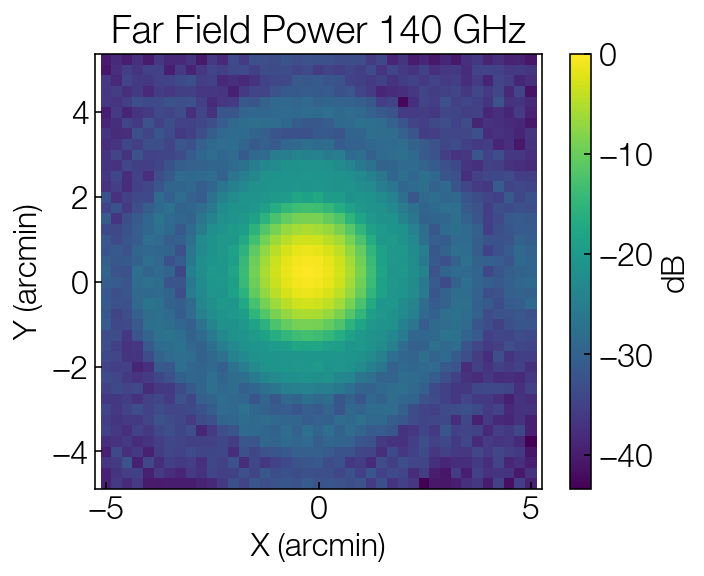

In [38]:
import numpy as np
import matplotlib.pyplot as plt

test = np.loadtxt('../output_files/ff_1.32m_140GHz_highres.txt')

news = int(np.sqrt(len(test[:,0])))
x_out = np.reshape(test[:,0],(news,news))
y_out = np.reshape(test[:,1],(news,news))
a = np.reshape(test[:,2],(news,news))
p = np.reshape(test[:,3],(news,news))

plt.figure( figsize=(5,4) )
plt.title("Far Field Power 140 GHz")
plt.pcolormesh(60*np.rad2deg(x_out),60*np.rad2deg(y_out),20*np.log10(abs(a)/np.max(abs(a))),shading = 'auto')
plt.colorbar(label = 'dB')
plt.xlabel('X (arcmin)')
plt.ylabel('Y (arcmin)')
plt.axis("equal")
plt.show()

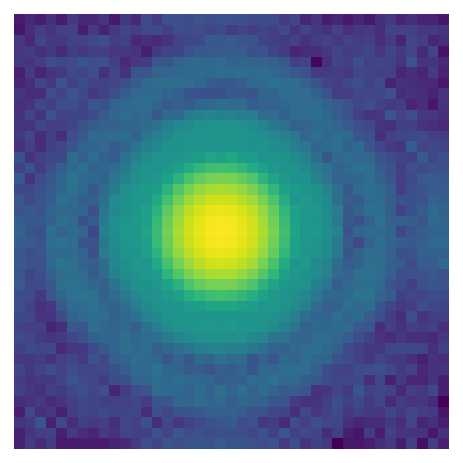

In [39]:
fig,ax = plt.subplots(1,1, figsize=(5,4) )
# plt.title("Far Field Power 140 GHz")
ax.pcolormesh(60*np.rad2deg(x_out),60*np.rad2deg(y_out),20*np.log10(abs(a)/np.max(abs(a))),shading = 'auto')
# plt.colorbar(label = 'dB')
# plt.xlabel('X (arcmin)')
# plt.ylabel('Y (arcmin)')
ax.set_axis_off()
ax.set_aspect("equal")
plt.show()